**1. Import Required Libraries and NLTK Resources**

In [4]:
import pandas as pd
import string
import nltk
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**2. Define Custom Text Preprocessor Class**

In [7]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stemmer = PorterStemmer()
        self.stop_words = set(stopwords.words('english')) - {'not', 'no'}

    def preprocess(self, text):
        text = text.lower().translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        return ' '.join([self.stemmer.stem(word) for word in tokens if word not in self.stop_words])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self.preprocess)

**3. Load and Prepare the Dataset**

In [10]:
data = pd.read_csv("SMSSpamCollection", sep='\t', header=None, names=["label", "message"], encoding='latin1')
X = data['message']
y = data['label']

**4. Split Data into Training and Testing Sets**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**5. Build the Machine Learning Pipeline**

In [40]:
model = Pipeline([
    ('preprocess', TextPreprocessor()),
    ('tfidf', TfidfVectorizer(max_features=10000,ngram_range=(1, 2),min_df=3,max_df=0.8)),
    ('classifier', LinearSVC(class_weight='balanced', dual=False))
])

**6. Train the Model**

In [19]:
model.fit(X_train, y_train)
print("Model training completed.")

Model training completed.


**7. Evaluate Model Performance on Test Set**

In [38]:
predictions = model.predict(X_test)

print(f"\nAccuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(cm)

print(f"\nF1 Score (Spam): {f1_score(y_test, predictions, pos_label='spam'):.4f}")


Accuracy: 98.83%

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.98      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115


Confusion Matrix:
[[963   3]
 [ 10 139]]

F1 Score (Spam): 0.9553


**8. Visualize Confusion Matrix**

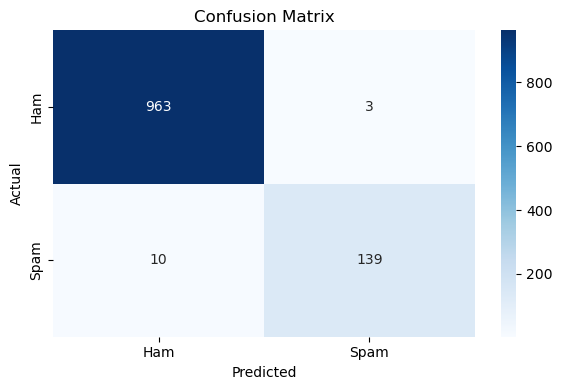

In [27]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**9. Save the Trained Model**

In [30]:
joblib.dump(model, "spam_detector_model.pkl")
print("Model saved as 'spam_detector_model.pkl'")

Model saved as 'spam_detector_model.pkl'


**10. Create an External Test Set (Unseen Messages)**

In [33]:
test_messages = [
    # Spam messages
    "Win a FREE ringtone! Text WIN to 80082 now!",
    "Congratulations! You won £500 cash. Call 09061701461 now!",
    "Get FREE polyphonic tones by texting POLY to 8888.",
    "URGENT! You have won a 2-week holiday. Call 09061702893 now!",
    "FREE entry into our weekly draw. Text WIN to 85069 now.",
    "You have won a guaranteed prize. Call 09050000327 now!",
    "Claim your FREE message tones. Text TONE to 80010 now.",
    "WIN a brand new mobile! Reply YES to claim.",
    "FREE video camera on new mobile contract! Call now.",
    "You have won £1000 guaranteed cash. Call 09061701461 now.",
    "Exclusive offer: 1000 free texts. Call 08002986906 now!",
    "FREE entry in our £100 cash draw. Text CASH to 8888.",
    "URGENT! Claim your FREE voucher now. Call 09061701444.",
    "You are selected to win FREE tickets. Call now.",
    "FREE upgrade on your mobile plan. Call 08002986030.",
    "Win a holiday for 2. Call 09050000321 now.",
    "Your prize is waiting! Call 09061702893 immediately.",
    "FREE ringtone for your mobile! Reply RING now.",
    "Claim your guaranteed prize today. Call 08002986906.",
    "You have won a FREE weekend getaway. Call 09050000327 now.",
    "Get FREE ringtones and wallpapers! Text FUN to 80082.",
    "You have won 500 FREE SMS. Call 09061701444.",
    "URGENT! You have won £2000. Call 09050000321 now!",
    "FREE mobile games available. Text GAME to 80010.",
    "Win BIG prizes! Call 09061702893 now.",
    # Ham messages
    "Hey, are you free for dinner tonight?",
    "Can you call me when you get this?",
    "Happy birthday! Have a great day.",
    "Are you coming to the meeting at 5?",
    "Let’s go out this weekend.",
    "Thanks for your help today.",
    "Did you reach home safely?",
    "Don’t forget to bring the charger.",
    "See you at the office tomorrow.",
    "I’ll call you in the evening.",
    "Good luck with your exams!",
    "Can you send me the notes later?",
    "Are we still on for lunch?",
    "Let me know when you’re online.",
    "Please call me when you’re free.",
    "Are you busy right now?",
    "Don’t be late for the movie.",
    "Meeting is at 10 AM tomorrow.",
    "I’ll text you after the class.",
    "Can you help me with this project?",
    "Thanks for the gift, really appreciate it.",
    "Let’s meet at the coffee shop at 4.",
    "Are you still at the gym?",
    "Just reached home, where are you?",
    "Take care and have a good night."
]

true_labels = ["spam"] * 25 + ["ham"] * 25
external_series = pd.Series(test_messages)
external_predictions = model.predict(external_series)

**11. Evaluate Model on External Test Set & Display Misclassified Messages**

In [36]:
correct_predictions = sum(1 for true, pred in zip(true_labels, external_predictions) if true == pred)
total_messages = len(test_messages)
accuracy = (correct_predictions / total_messages) * 100
error_rate = 100 - accuracy

print("\n===== External Test Set Results =====")
print(f"Total Messages: {total_messages}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {total_messages - correct_predictions}")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Error Rate: {error_rate:.2f}%")


print("\n===== Misclassified Messages =====")
for msg, pred, actual in zip(test_messages, external_predictions, true_labels):
    if pred != actual:
        print(f"Message: {msg}")
        print(f"Predicted: {pred} | Actual: {actual}")
        print('-' * 60)



===== External Test Set Results =====
Total Messages: 50
Correct Predictions: 49
Incorrect Predictions: 1
Accuracy: 98.00%
Error Rate: 2.00%

===== Misclassified Messages =====
Message: Please call me when you’re free.
Predicted: spam | Actual: ham
------------------------------------------------------------
